## Perceptron de Múltiplas Camadas

Redes Neurais: Classificar algo a partir de características

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel('SementesAbobora.xlsx')


In [ ]:
df.head()


,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
862,62781,959.756,362.4166,221.6199,63630,282.7282,0.7912,0.9867,0.7523,0.8565,1.6353,0.7801,(A) Çerçevelik
1026,61319,941.432,353.6914,222.1370,62304,279.4168,0.7782,0.9842,0.7085,0.8694,1.5922,0.7900,(A) Çerçevelik
560,72119,1027.928,403.8373,227.9709,72707,303.0260,0.8254,0.9919,0.7445,0.8577,1.7714,0.7504,(A) Çerçevelik
833,63618,946.484,356.6971,227.5221,64165,284.6067,0.7702,0.9915,0.7440,0.8924,1.5677,0.7979,(A) Çerçevelik
113,60145,938.701,357.5699,214.6178,60824,276.7291,0.7998,0.9888,0.6804,0.8577,1.6661,0.7739,(A) Çerçevelik


In [ ]:
df.shape


(2500, 13)

Uma base ordenada pode ser problema para o ML. Vamos embaralhar

In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)


In [ ]:
df.head()


,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
558,72007,1067.726,429.3661,214.5378,72908,302.7906,0.8662,0.9876,0.6383,0.7937,2.0014,0.7052,(A) Çerçevelik
1670,110838,1432.890,622.8818,227.7773,112366,375.6638,0.9307,0.9864,0.6615,0.6784,2.7346,0.6031,(B) Ürgüp Sivrisi
685,72566,1030.822,401.7252,230.4493,73117,303.9637,0.8191,0.9925,0.7393,0.8582,1.7432,0.7566,(A) Çerçevelik
906,74431,1025.762,372.9897,255.5686,75343,307.8449,0.7284,0.9879,0.7245,0.8889,1.4595,0.8253,(A) Çerçevelik
1966,69545,1169.341,522.2597,173.8518,70958,297.5692,0.9430,0.9801,0.6917,0.6391,3.0041,0.5698,(B) Ürgüp Sivrisi


In [ ]:
df['Class'].value_counts()

# Verificando o volume de dados de cada classe. O objetivo é deixar os dados equilibrados. Cada classe deve ter a quantidade parecida


Class
(A) Çerçevelik       1300
(B) Ürgüp Sivrisi    1200
Name: count, dtype: int64

### Análise Exploratória

In [ ]:
# Visualização

import seaborn as sns
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

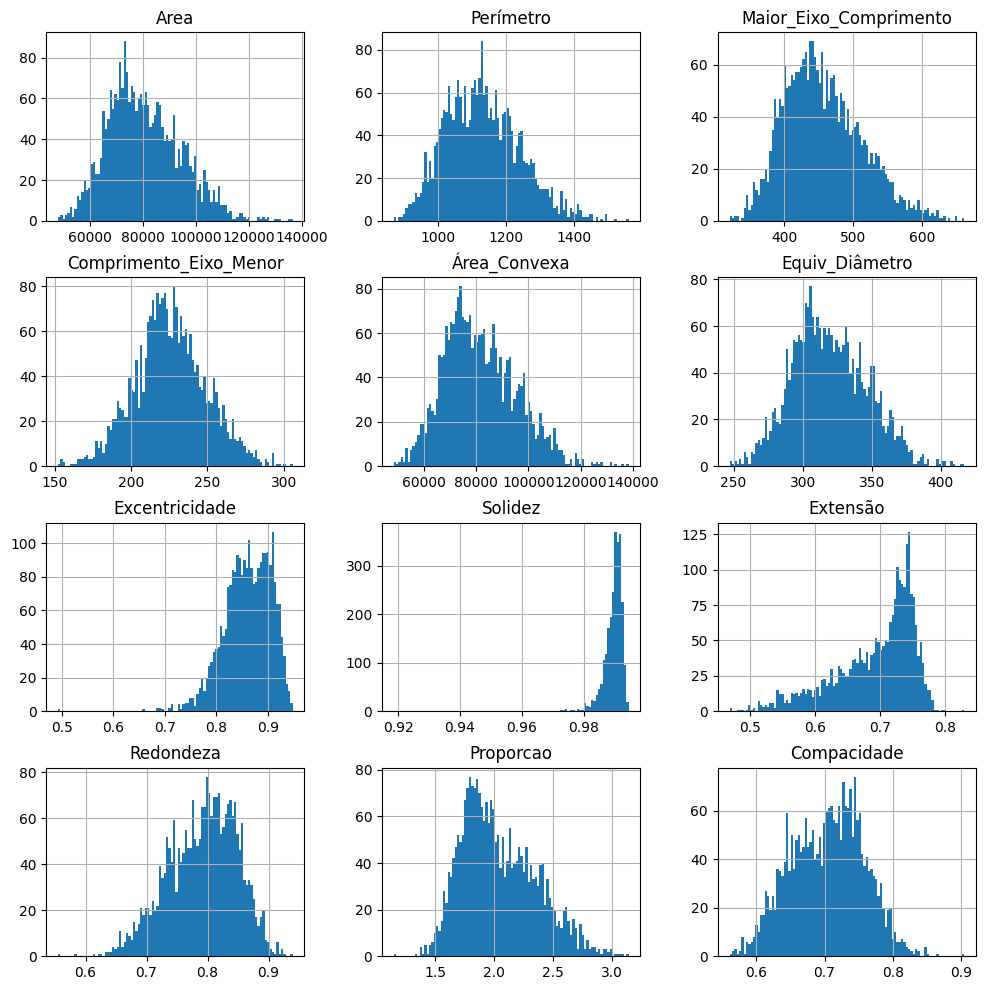

In [ ]:
# Plotanto o histogramas para analisar a simetria dos dados

df.hist(bins=100, figsize=(12,12))
plt.show


O histrograma mostra o comportamento para cada coluna. Podemos observar que não temos outliers no modelo para os dados, exceto para solidez e extensão.  

Devido ao resultado, vamos analisar as correlações


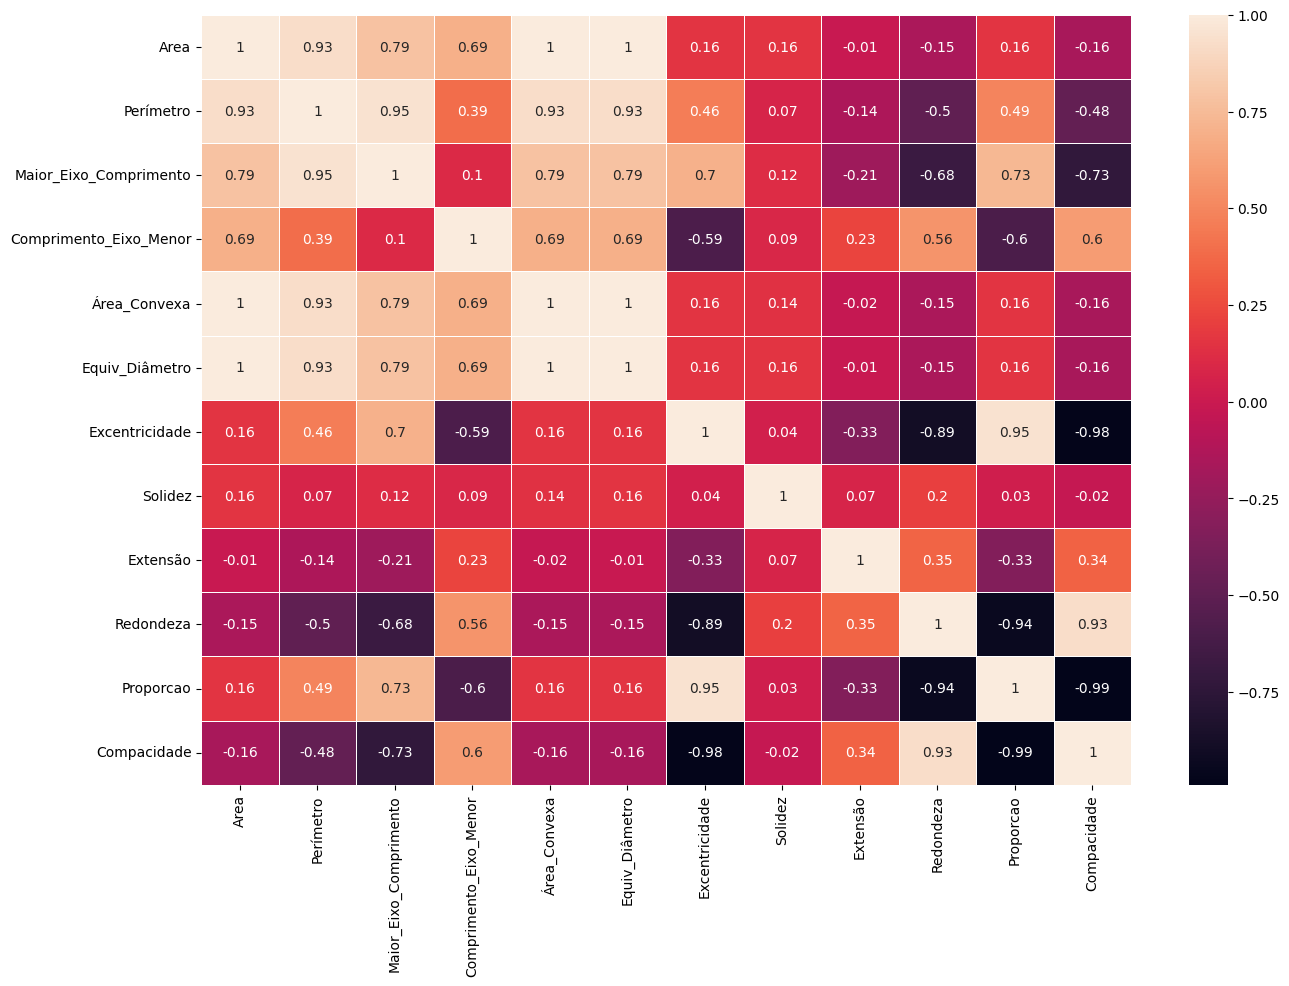

In [ ]:
# Exemplo: Carregar DataFrame
# df = pd.read_csv('seu_arquivo.csv') 

# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Calcular matriz de correlação
correlation_matrix = numeric_df.corr().round(2)

# Criar heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()


A correlação é muito importante para entendermos as relações das variáveis (ou seja, a associação entre duas variáveis). Podemos identificar aqui que temos variáveis altamente correlacionadas e sabemos que isso pode ser um problema para o modelo.

Area, Area_convexa, Equiv_Diâmetro e Maior_Eixo_Comprimento possuem correlação maior que 0.90 quando analisadas com a variável Perímetro, isso se deve pelo motivo que que todas essas variáveis são relacionadas ao tamanho das sementes. Já sabemos que não precisamos colocar todas no modelo.



### Tratando a variável Target

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 558 to 324
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    2500 non-null   int64  
 1   Perímetro               2500 non-null   float64
 2   Maior_Eixo_Comprimento  2500 non-null   float64
 3   Comprimento_Eixo_Menor  2500 non-null   float64
 4   Área_Convexa            2500 non-null   int64  
 5   Equiv_Diâmetro          2500 non-null   float64
 6   Excentricidade          2500 non-null   float64
 7   Solidez                 2500 non-null   float64
 8   Extensão                2500 non-null   float64
 9   Redondeza               2500 non-null   float64
 10  Proporcao               2500 non-null   float64
 11  Compacidade             2500 non-null   float64
 12  Class                   2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 273.4+ KB


In [ ]:
# Utilizando Label Enconder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Class = le.fit_transform(df['Class'])


In [ ]:
set(df['Class'])


{0, 1}

### Separando os dados / Modelo Perceptron

Como todo aprendizado de máquina, precisamos separar as bases de treino e teste! Vamos incluir todas as variáveis do modelo exceto as que estão altamente correlacionadas entre si (Area, Area_convexa, Equiv_Diâmetro e Maior_Eixo_Comprimento). Dentre as variáveis com muita correlação, vamos selecionar apenas a Area.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 558 to 324
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    2500 non-null   int64  
 1   Perímetro               2500 non-null   float64
 2   Maior_Eixo_Comprimento  2500 non-null   float64
 3   Comprimento_Eixo_Menor  2500 non-null   float64
 4   Área_Convexa            2500 non-null   int64  
 5   Equiv_Diâmetro          2500 non-null   float64
 6   Excentricidade          2500 non-null   float64
 7   Solidez                 2500 non-null   float64
 8   Extensão                2500 non-null   float64
 9   Redondeza               2500 non-null   float64
 10  Proporcao               2500 non-null   float64
 11  Compacidade             2500 non-null   float64
 12  Class                   2500 non-null   int32  
dtypes: float64(10), int32(1), int64(2)
memory usage: 263.7 KB


In [ ]:
# x = variáveis características  --> Para poder classificar o target que é o Class (y)
# y = 

# Base de teste = 20% em relação ao total --> 80% para treino

X = df[['Area','Perímetro', 'Comprimento_Eixo_Menor','Excentricidade','Solidez','Extensão','Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### Pré-processamento dos dados
Apesar de deep learning não requerer distribuições normais, é comum aplicar técnicas de pré-processamento de dados para normalizar ou padronizar as características. Isso pode ajudar a acelerar a convergência do treinamento da rede neural.

A convergência está relacionada com o erro, ou seja, o quanto a sua rede aprende a corrigir os erros durante o processamento.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)


StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train


array([[ 0.40569663,  0.77701212, -0.65480325, ..., -1.00785201,
         1.32647308, -1.27691866],
       [-0.53282882,  0.06309685, -1.00540317, ..., -1.32601819,
         0.86764646, -0.99864638],
       [ 0.06924843, -0.07039627,  0.29221213, ...,  0.36500868,
        -0.35871762,  0.27692387],
       ...,
       [-1.01840209, -1.2175138 ,  0.05882418, ...,  0.911692  ,
        -1.15640386,  1.24620785],
       [-0.53626664,  0.55897304, -0.64153637, ..., -2.41938484,
         0.24017516, -0.37300065],
       [-1.3236043 , -1.75044567, -0.03853773, ...,  1.74665849,
        -1.3803213 ,  1.58424331]])

In [ ]:
X_train.shape


(2000, 9)

In [ ]:
X_test.shape


(500, 9)

### Moldando nossas variáveis resposta
Perceba que a nossas classes estão em um formato de estrutura de dados unidimensional (assim como uma coluna) e precisamos moldar para o formato de array -n dimensional(matriz).

O comando reshape é utilizado para reformatar a estrutura de um array multidimensional, como um tensor, que é a estrutura de dados fundamental usada em deep learning e processamento de dados em redes neurais.

Temos que transformar os dados de series para

In [ ]:
type(y_train)


pandas.core.series.Series

In [ ]:
import numpy as np


In [ ]:
# reshape() molda uma matriz sem alterar os dados da matriz

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))


In [ ]:
type(y_train)


numpy.ndarray

In [ ]:
y_train.shape


(2000, 1)

### Construindo a arquitetura da rede neural multicamadas 🦾
Agora utilizando as bibliotecas tensorflow e keras, vamos construir a arquitetura da nossa primeira rede neural.

In [ ]:
pip install tensorflow


In [ ]:
pip install tqdm


In [ ]:
import tensorflow as tf

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback


C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Semente aleatótia para manter os mesmos dados
tf.random.set_seed(7)


In [ ]:
# Definindo entradas da rede + tamanho da batch de processamento
input_shape = X_train.shape[1]    # Variáveis de entrada
output_shape = y_train.shape[1]   # Classe preditora
batch_size = 20


In [ ]:
# Abrindo uma sequencia de neuronios
model = models.Sequential()


In [ ]:
# input layer
# Entrada da rede
model.add(layers.Dense(
                        batch_size
                       ,input_shape=(input_shape,)
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        12
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        6
                       ,activation='relu'))


# dropout layer
# Aplicando regularização
model.add(layers.Dropout(0.5))

# output layer
# Camada de saída
model.add(layers.Dense(
                        output_shape
                       ,activation='sigmoid'))

# Configurar o otimizador Adam com uma learning rate específica
# Defina a learning rate desejada
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

# Compilar o modelo com o otimizador configurado
model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# summmary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 957 (3.74 KB)

 Trainable params: 957 (3.74 KB)

 Non-trainable params: 0 (0.00 B)

Agora vamos executar as épocas de processamento para a rede treinar e encontrar o menor erro:

In [48]:
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )


100%|██████████| 100/100 [00:19<00:00,  5.14epoch/s, accuracy=0.862, loss=0.294, val_accuracy=0.862, val_loss=0.329]


In [ ]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")


O modelo possui uma acurácia de 86.20% com 100 epochs de processamento


### Validando nosso modelo
É muito importante comparar a performance do modelo tanto na base de treinamento quanto de validação. Para isso vamos plotar dois gráficos para acompanhar a performance do modelo pelas épocas de processamento.

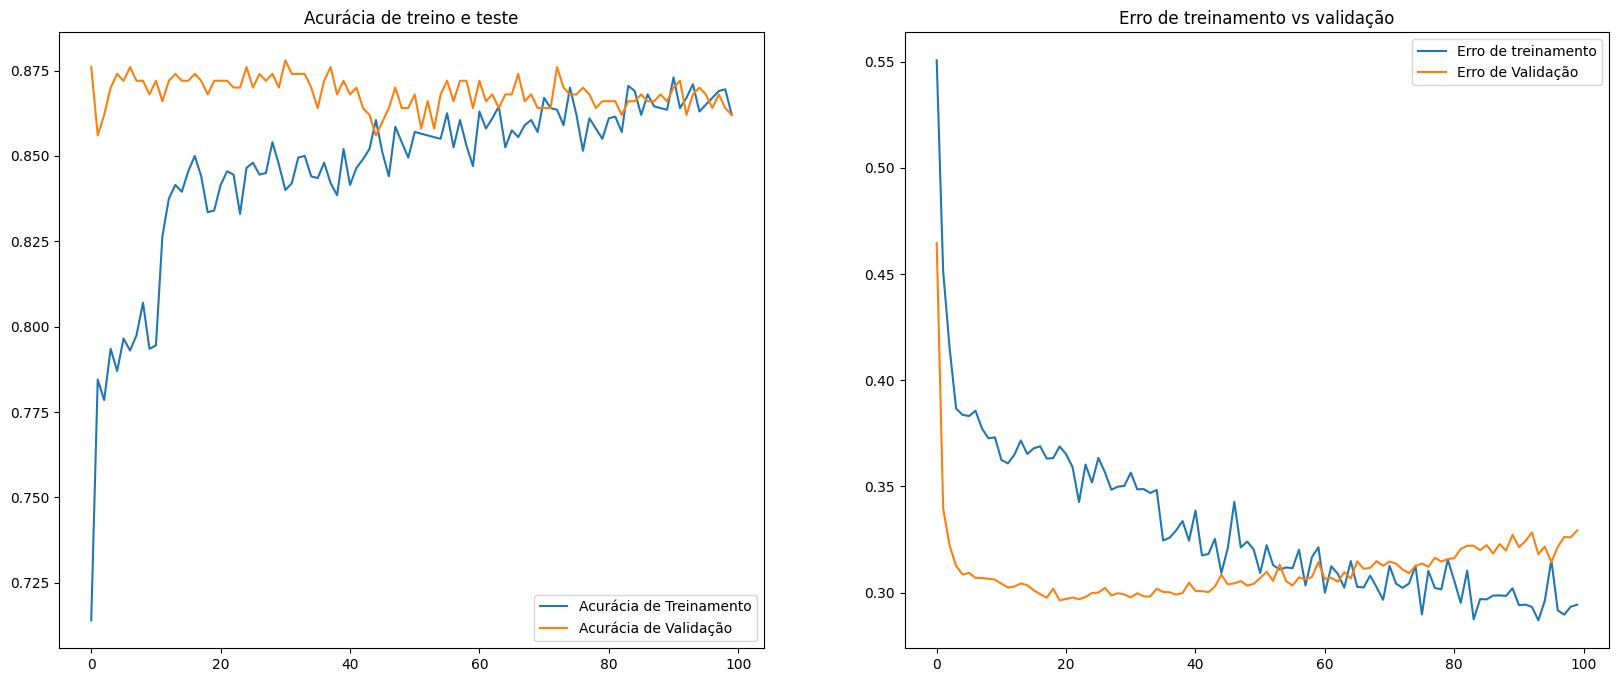

In [ ]:
# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report
class_names = []
for i in y.unique():
    class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                   precision    recall  f1-score   support

  (A) Çerçevelik        0.83      0.92      0.87       261
(B) Ürgüp Sivrisi       0.90      0.80      0.85       239

         accuracy                           0.86       500
        macro avg       0.87      0.86      0.86       500
     weighted avg       0.87      0.86      0.86       500

